In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
import matplotlib.pyplot as plt
from sklearn import*
import warnings

# Reading data and Visualization

In [3]:
df=pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Pre-processing

checking shape of the dataframe and finding leakages

In [4]:
print('shape of the dataframe is : ',df.shape)

shape of the dataframe is :  (1000, 8)


In [5]:
for col in df.columns:
    print(col)
    print('number of leakages  :  ',len(df[df[col]==np.NaN]))

gender
number of leakages  :   0
race/ethnicity
number of leakages  :   0
parental level of education
number of leakages  :   0
lunch
number of leakages  :   0
test preparation course
number of leakages  :   0
math score
number of leakages  :   0
reading score
number of leakages  :   0
writing score
number of leakages  :   0


Data is very good as it does not contain any leakages. As per the data is small if we faced leakages then predicting or making EDA would be tough.

As we don't have to preprocess any leakages we initiate numeration of categorical data

We have to numerate --
1. Gender
2. Race/ethnicity
3. Parental level of Education
4. Lunch
5. Test preparation course

1. gender:   ( 0 - male )     ( 1 - female )
2. lunch:     ( 0 - free/reduced )   ( 1 - standard )
3. test preparation course:     ( 0 - completed )   ( 1 - none )

In [6]:
df['gender'].replace('male',0,inplace=True)
df['gender'].replace('female',1,inplace=True)
df['lunch'].replace('free/reduced',0,inplace=True)
df['lunch'].replace('standard',1,inplace=True)
df['test preparation course'].replace('completed',0,inplace=True)
df['test preparation course'].replace('none',1,inplace=True)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,1,1,72,72,74
1,1,group C,some college,1,0,69,90,88
2,1,group B,master's degree,1,1,90,95,93
3,0,group A,associate's degree,0,1,47,57,44
4,0,group C,some college,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,1,group E,master's degree,1,0,88,99,95
996,0,group C,high school,0,1,62,55,55
997,1,group C,high school,0,0,59,71,65
998,1,group D,some college,1,0,68,78,77


* Race Numeration

In [7]:
for i in range(65,91):
    st='group '
    st+=chr(i)
    print(len(df[df['race/ethnicity']==st]))

89
190
319
262
140
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


There are 5 different races.changing them into numeric values

1. group A - 0
2. group B - 1
3. group C - 2
4. group D - 3
5. group E - 4

In [8]:
groups=[]
for i in range(65,70):
    st='group '
    st+=chr(i)
    groups.append(st)
    df['race/ethnicity'].replace(st,i-65,inplace=True)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,bachelor's degree,1,1,72,72,74
1,1,2,some college,1,0,69,90,88
2,1,1,master's degree,1,1,90,95,93
3,0,0,associate's degree,0,1,47,57,44
4,0,2,some college,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,1,4,master's degree,1,0,88,99,95
996,0,2,high school,0,1,62,55,55
997,1,2,high school,0,0,59,71,65
998,1,3,some college,1,0,68,78,77


* Parental education numeration

1. high school - 0
2. some high school - 0
3. some college - 1
4. bachelor's degree - 2
5. master's degree - 3
6. associate's degree - 4

In [9]:
df['parental level of education'].replace('high school',0,inplace=True)
df['parental level of education'].replace('some high school',0,inplace=True)
df['parental level of education'].replace('some college',1,inplace=True)
df['parental level of education'].replace("associate's degree",2,inplace=True)
df['parental level of education'].replace("master's degree",4,inplace=True)
df['parental level of education'].replace("bachelor's degree",3,inplace=True)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,3,1,1,72,72,74
1,1,2,1,1,0,69,90,88
2,1,1,4,1,1,90,95,93
3,0,0,2,0,1,47,57,44
4,0,2,1,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,1,4,4,1,0,88,99,95
996,0,2,0,0,1,62,55,55
997,1,2,0,0,0,59,71,65
998,1,3,1,1,0,68,78,77


Total data has been numerated now.
We can perform EDA now.

# EDA : EXPLORATORY DATA ANALYSIS

* gender

In [10]:
sub=['math','reading','writing']

In [11]:
print('no. of girl students : ',len(df[df['gender']==1]))
print('no. of boy students : ',len(df[df['gender']==0]))

no. of girl students :  518
no. of boy students :  482


marks per subject :


[68.72821576763485, 65.47302904564316, 63.31120331950208]
[63.633204633204635, 72.60810810810811, 72.46718146718146]


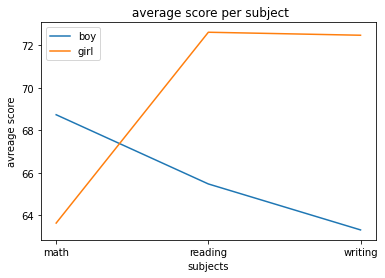

In [12]:

boy=[]
girl=[]
mrk=df[df['gender']==0]
boy.append(np.mean(mrk['math score']))
boy.append(np.mean(mrk['reading score']))
boy.append(np.mean(mrk['writing score']))
mrk=df[df['gender']==1]
girl.append(np.mean(mrk['math score']))
girl.append(np.mean(mrk['reading score']))
girl.append(np.mean(mrk['writing score']))
print(boy)
print(girl)
plt.title(' average score per subject')
plt.ylabel('avreage score')
plt.xlabel('subjects')
plt.plot(sub,boy,label='boy')
plt.legend()
plt.plot(sub,girl,label='girl')
plt.legend()
plt.show()

Data shows boys have good computational skill whereas girls possess well social interaction skills.

It has also proven by many scientists biologically.

* **race/ethnicity**

Math's Score

In [13]:
math=[]
for i in range(5):
    data=df[df['race/ethnicity']==i]
    tot_sum=sum(data['math score'])
    st='group '
    st+=chr(i+65)
    print(st ,' :   ',tot_sum/len(data))
    math.append(tot_sum/len(data))

group A  :    61.62921348314607
group B  :    63.45263157894737
group C  :    64.46394984326018
group D  :    67.36259541984732
group E  :    73.82142857142857


Reading's score

In [14]:
reading=[]
for i in range(5):
    data=df[df['race/ethnicity']==i]
    tot_sum=sum(data['reading score'])
    st='group '
    st+=chr(i+65)
    print(st ,' :   ',tot_sum/len(data))
    reading.append(tot_sum/len(data))

group A  :    64.67415730337079
group B  :    67.35263157894737
group C  :    69.10344827586206
group D  :    70.03053435114504
group E  :    73.02857142857142


Writing score

In [15]:
writing=[]
for i in range(5):
    data=df[df['race/ethnicity']==i]
    tot_sum=sum(data['writing score'])
    st='group '
    st+=chr(i+65)
    print(st ,' :   ',tot_sum/len(data))
    writing.append(tot_sum/len(data))

group A  :    62.674157303370784
group B  :    65.6
group C  :    67.82758620689656
group D  :    70.14503816793894
group E  :    71.40714285714286


Total score

In [16]:
tot_score=[]
for i in range(5):
    print(groups[i],'   :    ',(math[i]+reading[i]+writing[i])/3)
    tot_score.append((math[i]+reading[i]+writing[i])/3)

group A    :     62.99250936329588
group B    :     65.46842105263157
group C    :     67.13166144200626
group D    :     69.1793893129771
group E    :     72.75238095238096


Score comparison between racses

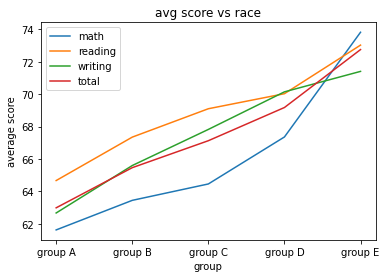

In [17]:
race=['group A','group B','group C','group D','group E']
plt.plot(race,math,label='math')
plt.legend()
plt.plot(race,reading,label='reading')
plt.legend()
plt.plot(race,writing,label='writing')
plt.legend()
plt.plot(race,tot_score,label='total')
plt.legend()
plt.title('avg score vs race')
plt.xlabel('group')
plt.ylabel('average score')
plt.show()

max and min score per race   and range lookup

maximum score in maths group A is :   100
minimum score in maths group A is :   28
range  :    72
maximum score in reading group A is :   100
minimum score in reading group A is :   23
range  :    77
maximum score in writing group A is :   97
minimum score in writing group A is :   19
range  :    78
average range :   75.66666666666667


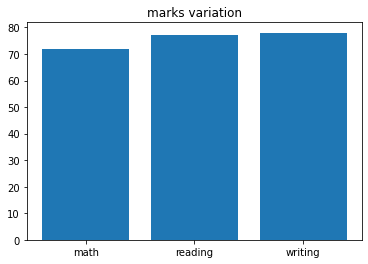

maximum score in maths group B is :   97
minimum score in maths group B is :   8
range  :    89
maximum score in reading group B is :   97
minimum score in reading group B is :   24
range  :    73
maximum score in writing group B is :   96
minimum score in writing group B is :   15
range  :    81
average range :   81.0


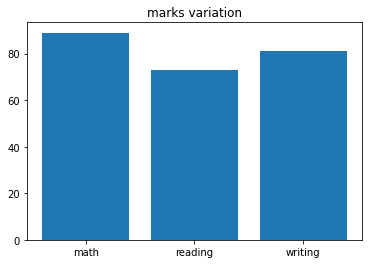

maximum score in maths group C is :   98
minimum score in maths group C is :   0
range  :    98
maximum score in reading group C is :   100
minimum score in reading group C is :   17
range  :    83
maximum score in writing group C is :   100
minimum score in writing group C is :   10
range  :    90
average range :   90.33333333333333


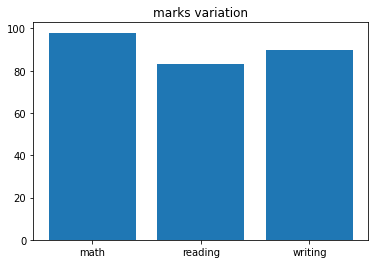

maximum score in maths group D is :   100
minimum score in maths group D is :   26
range  :    74
maximum score in reading group D is :   100
minimum score in reading group D is :   31
range  :    69
maximum score in writing group D is :   100
minimum score in writing group D is :   32
range  :    68
average range :   70.33333333333333


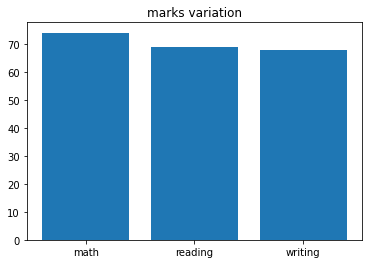

maximum score in maths group E is :   100
minimum score in maths group E is :   30
range  :    70
maximum score in reading group E is :   100
minimum score in reading group E is :   26
range  :    74
maximum score in writing group E is :   100
minimum score in writing group E is :   22
range  :    78
average range :   74.0


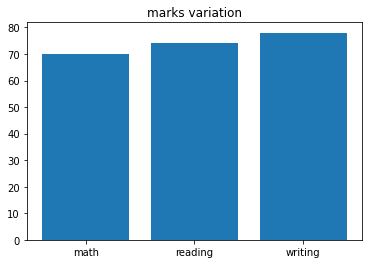

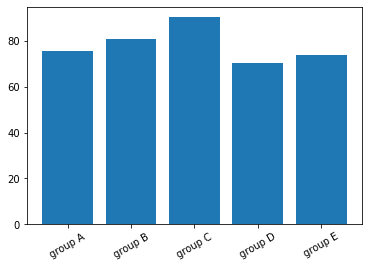

In [18]:

avgg=[]
for i in range(5):
    data=df[df['race/ethnicity']==i]
    pie_data=[]
    
    print('maximum score in maths',groups[i],'is :  ',max(data['math score']))
    print('minimum score in maths',groups[i],'is :  ',min(data['math score']))
    
    print('range  :   ',max(data['math score'])-min(data['math score']))
    pie_data.append(max(data['math score'])-min(data['math score']))
    
    print('maximum score in reading',groups[i],'is :  ',max(data['reading score']))
    print('minimum score in reading',groups[i],'is :  ',min(data['reading score']))
    
    print('range  :   ',max(data['reading score'])-min(data['reading score']))
    pie_data.append(max(data['reading score'])-min(data['reading score']))
    
    print('maximum score in writing',groups[i],'is :  ',max(data['writing score']))
    print('minimum score in writing',groups[i],'is :  ',min(data['writing score']))
    
    print('range  :   ',max(data['writing score'])-min(data['writing score']))
    pie_data.append(max(data['writing score'])-min(data['writing score']))
    
    avg=(max(data['math score'])-min(data['math score'])+max(data['reading score'])-min(data['reading score'])+max(data['writing score'])-min(data['writing score']))/3
    print('average range :  ',avg)
    avgg.append(avg)
    plt.title('marks variation')
    plt.bar(sub,pie_data)
    plt.show()
plt.bar(groups,avgg)
plt.xticks(rotation=30)
plt.show()

This plot shows us that group A,D,E students marks are not much variant but Group B,C have more vairant per subject

Similarly as per whole the group C has the highest variant marks which indicates a great variety of students where as group D are quite consistent over their marks indicating following a similar fashion than others

* **Parental Education** 

In [19]:
ped=["high school","some college","associate's degree","bachelor's degree","master's degree"]



no. of parents have  high school   :    375
no. of parents have  some college   :    226
no. of parents have  associate's degree   :    222
no. of parents have  bachelor's degree   :    118
no. of parents have  master's degree   :    59


Text(0.5, 1.0, 'Parental Education')

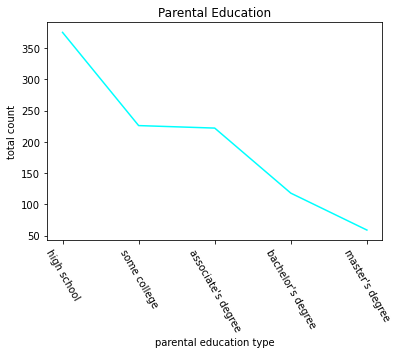

In [20]:
pedd=[]
for i in range(5):
    num=len(df[df['parental level of education']==i])
    print('no. of parents have ',ped[i],'  :   ',num)
    pedd.append(num)
plt.plot(ped,pedd,label=ped,color='aqua')
plt.xlabel('parental education type')
plt.xticks(rotation=300)
plt.ylabel('total count')
plt.title('Parental Education')

Data stated that as per the duration of study increases number of people dicreased.

That defines an average society.

marks per subject 

In [21]:
col=['r','b','g','y','k']

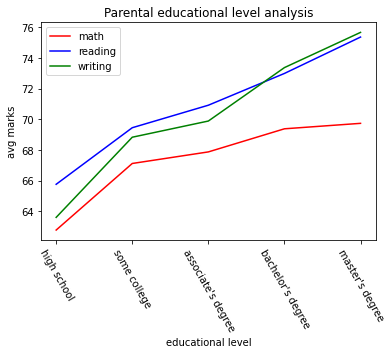

In [22]:
math=[]
reading=[]
writing=[]
for i in range(5):
    mrk=df[df['parental level of education']==i]
    math.append(np.mean(mrk['math score']))
    reading.append(np.mean(mrk['reading score']))
    writing.append(np.mean(mrk['writing score']))
plt.title('Parental educational level analysis')
plt.xlabel('educational level')
plt.ylabel('avg marks')
plt.plot(ped,math,color='r',label='math')
plt.legend()
plt.plot(ped,reading,color='b',label='reading')
plt.legend()
plt.plot(ped,writing,color='g',label='writing')
plt.legend()
plt.xticks(rotation=300)
plt.show()

This chart clearly stated that parental education is linearly dependant over child's marks AKA their nursing .
Parents having good educational background helped their children to grow a studious mindset and thus score higher.

Though the marks are increasing , still we can say getting marks in reading and writing are more easy than in maths.

marks variety in different cases

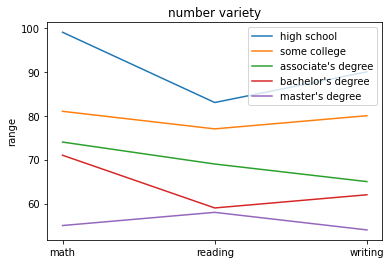

In [23]:
math=[]
reading=[]
writing=[]
plt.title('number variety')
plt.ylabel('range')
for i in range(5):
    mrk=df[df['parental level of education']==i]
    mar=[]
    mar.append(max(mrk['math score'])-min(mrk['math score']))
    math.append(max(mrk['math score'])-min(mrk['math score']))
    mar.append(max(mrk['reading score'])-min(mrk['reading score']))
    reading.append(max(mrk['reading score'])-min(mrk['reading score']))
    mar.append(max(mrk['writing score'])-min(mrk['writing score']))
    writing.append(max(mrk['writing score'])-min(mrk['writing score']))
    plt.plot(sub,mar,label=ped[i])
    plt.legend()


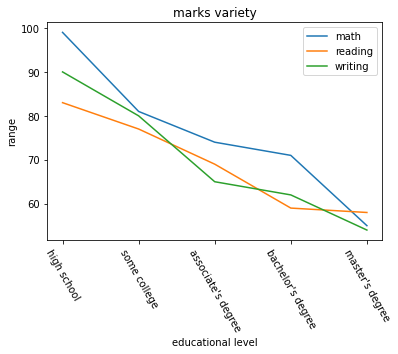

In [24]:
plt.title('marks variety')
plt.xlabel('educational level')
plt.ylabel('range')
plt.plot(ped,math,label='math')
plt.legend()
plt.plot(ped,reading,label='reading')
plt.legend()
plt.plot(ped,writing,label='writing')
plt.legend()
plt.xticks(rotation=300)
plt.show()

These 2 curves show us that parental education affects children's marks heavily.


Less educated parent can't guide their child well and that shows that some brilliant student scores very high and some scores very low creating a larger variance.

similarly well educated parent's child have scores moreover in a narrow bound.

We can stii say one more thing ---

parents having bachelor's degree only high school degree possess different consistencies over subjects whereas others are quite similar...

Consistency :  Master's Degree > College going > Associate's Degree > Bachelor's Degree > High school Degree

* Lunch

Basically lunch can help students to have more focus on studies and thus on marks .Let's check that if it can truly visualized by the data.

In [25]:
print('students get lunch :',len(df[df['lunch']==0]))
print("student doesen't get enough lunch :",len(df[df['lunch']==1]))

students get lunch : 355
student doesen't get enough lunch : 645


Average Score

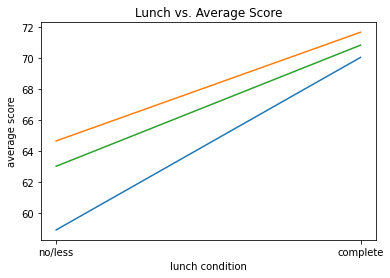

In [26]:
lun=['no/less','complete']
math=[]
reading=[]
writing=[]
for i in range(2):
    dat=df[df['lunch']==i]
    math.append(np.mean(dat['math score']))
    reading.append(np.mean(dat['reading score']))
    writing.append(np.mean(dat['writing score']))
plt.title('Lunch vs. Average Score')
plt.plot(lun,math,label='math')
plt.plot(lun,reading,label='reading')
plt.plot(lun,writing,label='writing')
plt.xlabel('lunch condition')
plt.ylabel('average score')
plt.show()

Clearly visible that the previous conclusion proved here.

Lunch vs. Parental Education 

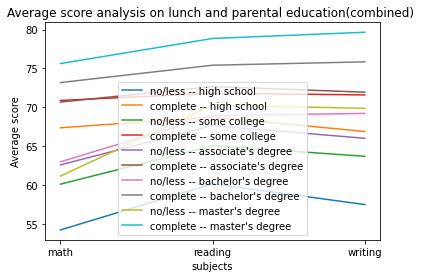

In [27]:

plt.title('Average score analysis on lunch and parental education(combined) ')
plt.xlabel('subjects')
plt.ylabel('Average score')
for i in range(5):
    dt=df[df['parental level of education']==i]
    for j in range(2):
        dt1=dt[dt['lunch']==j]
        m=np.mean(dt1['math score'])
        r=np.mean(dt1['reading score'])
        w=np.mean(dt1['writing score'])
        arr=[]
        arr.append(m)
        arr.append(r)
        arr.append(w)
        st=str(lun[j]+' -- '+ ped[i])
        plt.plot(sub,arr,label=st)
        plt.legend()


This graph showed us that students having standard lunch are scoring more than who had less or no lunch.
This graph also showed us that combining well educated parent's child are scoring more over others.

So,
Conclusion :   
* Score is proportional to *education of parents*.              
* Score is proportional to having *proper lunch*.

* **test preparation course**

Altough family status matters in scoring good marks , still a preparation over the exam may change the scores a lot.

In [28]:
pr=df[df['test preparation course']==0]
print('prepared for exams',len(pr))
pr1=df[df['test preparation course']==1]
print('not prepared for exams',len(pr1))


prepared for exams 358
not prepared for exams 642


average marks

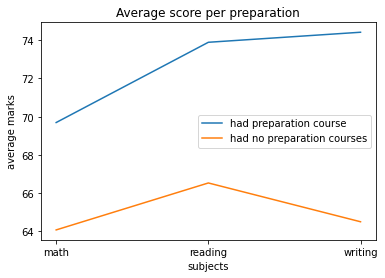

In [29]:
st=[]
nst=[]
st.append(np.mean(pr['math score']))
st.append(np.mean(pr['reading score']))
st.append(np.mean(pr['writing score']))
nst.append(np.mean(pr1['math score']))
nst.append(np.mean(pr1['reading score']))
nst.append(np.mean(pr1['writing score']))
plt.title('Average score per preparation')
plt.xlabel('subjects')
plt.ylabel('average marks')
plt.plot(sub,st,label='had preparation course')
plt.legend()
plt.plot(sub,nst,label="had no preparation courses")
plt.legend()
plt.show()

Hence proved that having preparation helped the student to score a lot more than others.

Scores of math are low all over every possibilites. So, it is clear the dataset is made based on students who are weaker in math and good in reading-writing.

Here the EDA ends.

# Please upvote if you like this EDA  :)

You can join my discoed server where I try to analyze over mant datasets:
Discord Link : https://discord.gg/zSK9an6J     (Atlantic Data Studio)